**Brief Honor Code**. Do the homework on your own. You may discuss ideas with your classmates, but DO NOT copy the solutions from someone else or the Internet. If stuck, discuss with TA.

**1**. (20 points)

Consider the linear transformation $f(x)$ on $\mathbb{R}^3$ that takes the standard basis $\left\{e_1,e_2,e_3\right\}$ to $\left\{v_1,v_2,v_3\right\}$ where

$$v_1=\left(\begin{matrix}10\\-10\\16\end{matrix}\right), v_2=\left(\begin{matrix}2\\-5\\20\end{matrix}\right) \textrm {and } v_3=\left(\begin{matrix}1\\-4\\13\end{matrix}\right)$$

1. Write a matrix $A$ that represents the same linear transformation. (4 points)

2. Compute the rank of $A$ using two different methods (do not use `matrix_rank`!). (4 points)

3. Find the eigenvalues and eigenvectors of $A$. (4 points)

4. What is the matrix representation of $f$ with respect to the eigenbasis? (8 points)

In [1]:
import numpy as np
import scipy.linalg as la

In [2]:
A = np.array([[10,2,1],[-10,-5,-4], [16,20,13]])
A

array([[ 10,   2,   1],
       [-10,  -5,  -4],
       [ 16,  20,  13]])

In [3]:
#np.linalg.matrix_rank(A)
U, s, Vt = la.svd(A)
tol = s.max() * max(A.shape) * np.finfo(float).eps
rank1 = np.sum(s > tol)
(q, r) = la.qr(A)
#to search how many colums have pivots
rank2 = np.sum((r != 0).any(axis=0))
rank1,rank2

(3, 3)

In [4]:
eg_value, eg_vector = np.linalg.eig(A)

In [5]:
eg_value

array([ 9.,  3.,  6.])

In [6]:
eg_vector

array([[  5.77350269e-01,   6.31950024e-16,  -1.20385853e-01],
       [ -5.77350269e-01,  -4.47213595e-01,  -2.40771706e-01],
       [  5.77350269e-01,   8.94427191e-01,   9.63086825e-01]])

In [7]:
np.linalg.inv(eg_vector) @ A @ eg_vector

array([[  9.00000000e+00,   7.75444829e-15,   6.25430592e-15],
       [  1.64008779e-14,   3.00000000e+00,  -5.98520757e-15],
       [ -5.19475027e-15,   3.56964333e-15,   6.00000000e+00]])

In [8]:
np.diag(eg_value)

array([[ 9.,  0.,  0.],
       [ 0.,  3.,  0.],
       [ 0.,  0.,  6.]])

**2**. (20 points)

You are given the following x-y coordinates (first column is x, second is y)

```
array([[  0.        ,   4.12306991],
       [  3.        , -15.47355729],
       [  4.        , -11.68725507],
       [  3.        , -20.33756693],
       [  5.        ,  -6.06401989],
       [  6.        ,  32.79353057],
       [  8.        ,  82.48658405],
       [  9.        ,  84.02971858],
       [  4.        ,  -1.30587276],
       [  8.        ,  68.59409878]])
```

- Find the coefficients $(a, b, c)$ of the least-squares fit of a quadratic function $y = a + bx + cx^2$ to the data. 
- Plot the data and fitted curve using `matplotlib`.

In [9]:
xs = np.array([
    [  0.        ,   4.12306991],
    [  3.        , -15.47355729],
    [  4.        , -11.68725507],
    [  3.        , -20.33756693],
    [  5.        ,  -6.06401989],
    [  6.        ,  32.79353057],
    [  8.        ,  82.48658405],
    [  9.        ,  84.02971858],
    [  4.        ,  -1.30587276],
    [  8.        ,  68.59409878]])

In [10]:
length = len(xs)
x1 = [xs[i][0] for i in range(length)]
X = np.vstack([np.power(x1, 0),np.power(x1, 1),np.power(x1, 2)]).T
y = [xs[i][1] for i in range(length)]

In [11]:
beta = np.linalg.inv(X.T @ X) @X.T @y
beta = beta.reshape(-1,1)
beta

array([[ -0.35762896],
       [-11.78531232],
       [  2.53125199]])

In [12]:
yhat = X @ beta
xcon = np.linspace(0, 9 ,10)
Xfull = np.vstack([np.power(xcon, 0),np.power(xcon, 1),np.power(xcon, 2)]).T
ycon1 = Xfull@ beta

In [13]:
import matplotlib.pyplot as plt
plt.plot(x1,y, "ro")
plt.plot(ycon1, label="Prediction")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

**3**. (20 points)

Use the `svd` function to solve the least squares problem above, and repeat the same plot. Calculate the residual error $\lvert y - X\beta \rvert$.

In [14]:
U, S, V, = np.linalg.svd(X, y)
ps_inv_sigma = np.r_[np.linalg.inv(np.diag(S.tolist())),np.zeros((7,3))].T

In [15]:
beta1 = V.T@(ps_inv_sigma) @U.T @ y
yhat1 = X @ beta1

In [16]:
abserr = np.abs(y - yhat1)
abserr

array([  4.48069887,   2.54125925,   4.68840861,   7.40526889,
        10.06112898,  12.73796195,  15.12658447,  14.57625244,
         5.6929737 ,   1.2340992 ])

In [17]:
#sum abs error
np.sum(abserr)

78.544636354965434

In [46]:
#sum l_2 norm error
np.sqrt(np.sum((y - yhat1)**2))

29.018088805093509

In [19]:
ycon2 = Xfull@ beta1

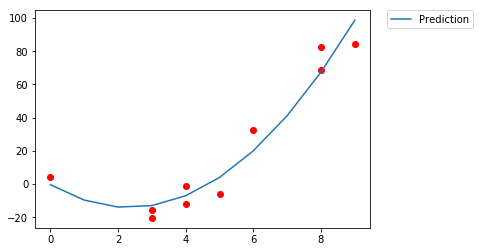

In [20]:
plt.plot(x1,y, "ro")
plt.plot(ycon2, label="Prediction")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

**4**. (20 points) 

Avoiding catastrophic cancellation.

Read the Wikipedia entry on [loss of significance](https://en.wikipedia.org/wiki/Loss_of_significance). Then answer the following problem:

The tail of the standard logistic distribution is given by $1 - F(t) = 1 - (1+e^{-t})^{-1}$.

- Define a function `f1` to calculate the tail probability of the logistic distribution using the formula given above
- Use [`sympy`](http://docs.sympy.org/latest/index.html) to find the exact value of the tail distribution (using the same symbolic formula) to 20 decimal digits
- Calculate the *relative error* of `f1` when $t = 25$ (The relative error is given by `abs(exact - approximate)/exact`)
- Rewrite the expression for the tail of the logistic distribution using simple algebra so that there is no risk of cancellation, and write a function `f2` using this formula. Calculate the *relative error* of `f2` when $t = 25$. 
- How much more accurate is `f2` compared with `f1` in terms of the relative error?

In [21]:
def f1(t):
    """
    return right tail of logistic distribution
    """
    return 1-(1+np.exp(-t))**(-1)

In [22]:
from sympy import exp
def fexact(t, n=20):
    """
    return right tail of logistic distribution
    """
    return (1 - (1 + exp(-t))**(-1)).evalf(n=n)

In [23]:
e1= abs(fexact(25) - f1(25))/fexact(25)
e1

4.1759147665982646285e-6

In [24]:
def f2(t):
    """
    return right tail of logistic distribution
    """
    return 1/(1 + np.exp(t))

In [25]:
e2 =abs(fexact(25) - f2(25))/fexact(25)
e2

2.3034925262183876741e-16

In [48]:
(e1-e2)/e2

18128623031.494952608

**5**. (20 points)

Read in `figs/elephant.jpg` as a gray-scale image. The image has $1066 \times 1600$ values. Using SVD, recreate the image with a relative error of less than 0.5%. What is the relative size of the compressed image as a percentage?

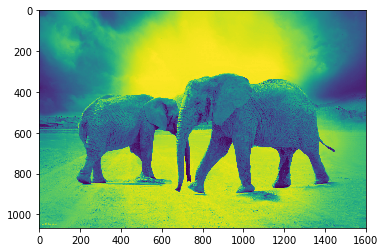

In [38]:
from skimage import io
img = io.imread('figs/elephant.jpg', as_grey=True)
plt.imshow(img)
plt.show()

In [39]:
U.shape, V.shape

((1066, 1066), (1600, 1600))

In [32]:
U, S, V = np.linalg.svd(img)
i = 1
s = np.sum(S[:i]**2)
while s/np.sum(S**2) < 1 - 0.005:
        i +=1
        s = np.sum(S[:i]**2)

In [33]:
i

21

In [34]:
(i*1066 + i + i*1600)/(1066*1600)

0.032837124765478426

In this case, it takes about 3.3% spaces of the orginal plot.

In [31]:
#np.where(np.cumsum(S**2)/np.sum(S**2) > 1 - 0.005**2) start from 0? index is 562